In [4]:
import pandas as pd

load the dataset

In [5]:
df = pd.read_csv('Sample Dataset.csv')


CHECK FOR BASIC INFOS 


In [7]:
print(df.head()) # display the first few rows of the dataframe
print(df.shape) # display the shape of the dataframe
print(df.info()) # display the summary information of the dataframe
print(df['Price'].describe()) # display the statistical summary of the 'Price' column
print(df.isnull().sum()) # display the count of missing values in each column 

           Brand  Year   Model               Car/Suv  \
0      Ssangyong  2022  Rexton  Sutherland Isuzu Ute   
1             MG  2022     MG3             Hatchback   
2            BMW  2022    430I                 Coupe   
3  Mercedes-Benz  2011    E500                 Coupe   
4        Renault  2022  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption  Kilometres  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km        5595   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km          16   
2    4 cyl, 2 L      Rear   Premium

SELECT ONLY USEFUL ONES

In [237]:
features = ['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 
            'Transmission', 'Engine', 'DriveType', 'FuelType', 
            'FuelConsumption', 'Kilometres', 'Location', 'CylindersinEngine','Location']

target = 'Price'

CREATE SMALLER DATAFRAMES

In [238]:
df_model = df[features + [target]].copy()
print(df_model.head())
print(df_model.isnull().sum())

           Brand  Year   Model               Car/Suv UsedOrNew Transmission  \
0      Ssangyong  2022  Rexton  Sutherland Isuzu Ute      DEMO    Automatic   
1             MG  2022     MG3             Hatchback      USED    Automatic   
2            BMW  2022    430I                 Coupe      USED    Automatic   
3  Mercedes-Benz  2011    E500                 Coupe      USED    Automatic   
4        Renault  2022  Arkana                   SUV      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption  Kilometres  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km        5595   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km          16   
2    4 cyl, 2 L      Rear   Premium  6.6 L / 100 km        8472   
3  8 cyl, 5.5 L      Rear   Premium   11 L / 100 km      136517   
4  4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km        1035   

            Location CylindersinEngine           Location   Price  
0     Caringbah, NSW             4 cyl     Caringbah, 

Handle the Text Data

#ONLY USING THE TEXT 
Already numerical (easy to use):

Year
Kilometres

Text but SIMPLE (few unique values):

Transmission (probably just "Automatic" and "Manual")
UsedOrNew (probably "USED", "NEW", "DEMO")
Car/Suv (probably just "Car" and "SUV")

Text and COMPLEX (many unique values):

Brand (30+ different brands)
Model (100+ different models)
Location (50+ different locations)
Engine (many variations like "4 cyl, 2.0 L")

In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
numerical_features = ['Year','Kilometres']
categorical_features = ['Model','Brand','CylindersinEngine' ,'Transmission', 'UsedOrNew', 'FuelType', 'DriveType']
target = 'Price'

In [241]:
df_model = df[numerical_features + categorical_features + [target]].copy()

In [242]:
print("Selected features:")
print(df_model.head())
print("\nData types:")
print(df_model.dtypes)

Selected features:
   Year  Kilometres   Model          Brand CylindersinEngine Transmission  \
0  2022        5595  Rexton      Ssangyong             4 cyl    Automatic   
1  2022          16     MG3             MG             4 cyl    Automatic   
2  2022        8472    430I            BMW             4 cyl    Automatic   
3  2011      136517    E500  Mercedes-Benz             8 cyl    Automatic   
4  2022        1035  Arkana        Renault             4 cyl    Automatic   

  UsedOrNew  FuelType DriveType   Price  
0      DEMO    Diesel       AWD   51990  
1      USED   Premium     Front   19990  
2      USED   Premium      Rear  108988  
3      USED   Premium      Rear   32990  
4      USED  Unleaded     Front   34990  

Data types:
Year                  int64
Kilometres            int64
Model                object
Brand                object
CylindersinEngine    object
Transmission         object
UsedOrNew            object
FuelType             object
DriveType            object
P

In [243]:
print("\nUnique values in categorical features:")
for col in categorical_features:
    print(f"{col}: {df_model[col].unique()}")

df_model = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)


Unique values in categorical features:
Model: ['Rexton' 'MG3' '430I' 'E500' 'Arkana' 'Estima' 'Rover' 'Pulsar' '86'
 'Jazz' 'HiAce' 'City' 'Golf' 'X3' 'Outlander' '118D' 'Fiesta' 'Amarok'
 'Outback' 'Mirage' 'Camry' '3' 'I45' 'Territory' 'Qashqai' 'T-Cross'
 'Tucson' 'Focus' 'X-Trail' 'Corolla' 'Yaris' 'Grand' 'Patriot' 'S60'
 'Triton' 'E250' 'A250' 'CX-5' 'Falcon' '595' 'CR-V' 'I30' '6' 'Kluger'
 'Santa' 'Cascada' 'ML320' 'Lancer' 'A5' 'RIO' 'Cherokee' 'Tiguan' 'ASX'
 '220I' 'Imax' 'XV' 'Cooper' '308' 'Commodore' 'I20' 'BT-50' 'Vezel'
 'CX-7' 'Renegade' 'Elgrand' 'Impreza' 'X4' '118I' 'C-CLASS']
Brand: ['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Toyota' 'Land' 'Nissan'
 'Honda' 'Volkswagen' 'Mitsubishi' 'Ford' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Peugeot']
CylindersinEngine: ['4 cyl' '8 cyl' '-' '3 cyl' '6 cyl' '5 cyl']
Transmission: ['Automatic' 'Manual']
UsedOrNew: ['DEMO' 'USED' 'NEW']
FuelType: ['Diesel' 'Premium' 'Unleaded' 'Hy

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [245]:
print("Data after one-hot encoding:")
print(df_model.columns.tolist())

print("Total columns after encoding:", len(df_model.columns))

Data after one-hot encoding:
['Year', 'Kilometres', 'Price', 'Model_118I', 'Model_220I', 'Model_3', 'Model_308', 'Model_430I', 'Model_595', 'Model_6', 'Model_86', 'Model_A250', 'Model_A5', 'Model_ASX', 'Model_Amarok', 'Model_Arkana', 'Model_BT-50', 'Model_C-CLASS', 'Model_CR-V', 'Model_CX-5', 'Model_CX-7', 'Model_Camry', 'Model_Cascada', 'Model_Cherokee', 'Model_City', 'Model_Commodore', 'Model_Cooper', 'Model_Corolla', 'Model_E250', 'Model_E500', 'Model_Elgrand', 'Model_Estima', 'Model_Falcon', 'Model_Fiesta', 'Model_Focus', 'Model_Golf', 'Model_Grand', 'Model_HiAce', 'Model_I20', 'Model_I30', 'Model_I45', 'Model_Imax', 'Model_Impreza', 'Model_Jazz', 'Model_Kluger', 'Model_Lancer', 'Model_MG3', 'Model_ML320', 'Model_Mirage', 'Model_Outback', 'Model_Outlander', 'Model_Patriot', 'Model_Pulsar', 'Model_Qashqai', 'Model_RIO', 'Model_Renegade', 'Model_Rexton', 'Model_Rover', 'Model_S60', 'Model_Santa', 'Model_T-Cross', 'Model_Territory', 'Model_Tiguan', 'Model_Triton', 'Model_Tucson', 'Mod

# Separate features (X) and target (y)

In [246]:
X = df_model.drop('Price', axis=1)
Y = df_model['Price']

print("Features (X) shape:", X.shape)
print("Target (Y) shape:", Y.shape)
print("First few rows of features (X):", X.head())

Features (X) shape: (99, 108)
Target (Y) shape: (99,)
First few rows of features (X):    Year  Kilometres  Model_118I  Model_220I  Model_3  Model_308  Model_430I  \
0  2022        5595       False       False    False      False       False   
1  2022          16       False       False    False      False       False   
2  2022        8472       False       False    False      False        True   
3  2011      136517       False       False    False      False       False   
4  2022        1035       False       False    False      False       False   

   Model_595  Model_6  Model_86  ...  UsedOrNew_NEW  UsedOrNew_USED  \
0      False    False     False  ...          False           False   
1      False    False     False  ...          False            True   
2      False    False     False  ...          False            True   
3      False    False     False  ...          False            True   
4      False    False     False  ...          False            True   

   FuelType_

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print("Training set:",len(X_train))
print("Testing set:",len(X_test))

Training set: 79
Testing set: 20


In [248]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


In [249]:
y_pred = model.predict(X_test)

/Users/kcashmit/Kaplan/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/kcashmit/Kaplan/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/kcashmit/Kaplan/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [250]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  


In [251]:

print("MODEL PERFORMANCE")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")

print(f"Root Mean Squared Error: ${rmse:,.2f}")

MODEL PERFORMANCE
Mean Absolute Error: $9,998.37
R² Score: 0.2581
Root Mean Squared Error: $14,982.07


In [252]:
print("SAMPLE PREDICTIONS (First 15 Records)")
comparision = pd.DataFrame({
    'Actual Price': y_test.values[:15],
    'Predicted Price': y_pred[:15],
    'Difference': y_test.values[:15] - y_pred[:15]
})
print(comparision)

SAMPLE PREDICTIONS (First 15 Records)
    Actual Price  Predicted Price    Difference
0           9990      7672.695882   2317.304118
1          32900     27956.628284   4943.371716
2          26880     29560.316413  -2680.316413
3          13999     12501.871818   1497.128182
4          16999     36178.357777 -19179.357777
5          24888     35512.048011 -10624.048011
6          24999     28202.620702  -3203.620702
7           9999     19324.937426  -9325.937426
8          42500     38199.845448   4300.154552
9          51990     28417.246291  23572.753709
10         24880      9563.477638  15316.522362
11         22990     21477.533364   1512.466636
12         19900     16534.407842   3365.592158
13          8499      3986.541820   4512.458180
14         22750     13926.217279   8823.782721


In [253]:
print(X.columns.tolist())
print(len(X.columns))

['Year', 'Kilometres', 'Model_118I', 'Model_220I', 'Model_3', 'Model_308', 'Model_430I', 'Model_595', 'Model_6', 'Model_86', 'Model_A250', 'Model_A5', 'Model_ASX', 'Model_Amarok', 'Model_Arkana', 'Model_BT-50', 'Model_C-CLASS', 'Model_CR-V', 'Model_CX-5', 'Model_CX-7', 'Model_Camry', 'Model_Cascada', 'Model_Cherokee', 'Model_City', 'Model_Commodore', 'Model_Cooper', 'Model_Corolla', 'Model_E250', 'Model_E500', 'Model_Elgrand', 'Model_Estima', 'Model_Falcon', 'Model_Fiesta', 'Model_Focus', 'Model_Golf', 'Model_Grand', 'Model_HiAce', 'Model_I20', 'Model_I30', 'Model_I45', 'Model_Imax', 'Model_Impreza', 'Model_Jazz', 'Model_Kluger', 'Model_Lancer', 'Model_MG3', 'Model_ML320', 'Model_Mirage', 'Model_Outback', 'Model_Outlander', 'Model_Patriot', 'Model_Pulsar', 'Model_Qashqai', 'Model_RIO', 'Model_Renegade', 'Model_Rexton', 'Model_Rover', 'Model_S60', 'Model_Santa', 'Model_T-Cross', 'Model_Territory', 'Model_Tiguan', 'Model_Triton', 'Model_Tucson', 'Model_Vezel', 'Model_X-Trail', 'Model_X3'

40 features total including Brand. 
But your R² = 0.44 is still pretty poor. This is exactly WHY we need to try Random Forest.

In [254]:
from sklearn.ensemble import RandomForestRegressor


In [255]:
model_rf = RandomForestRegressor(n_estimators=500, random_state=42,max_depth =10)
model_rf.fit(X_train, y_train)
print("Random Forest Model training completed.")


Random Forest Model training completed.


In [256]:
y_pred_rf = model_rf.predict(X_test)

In [257]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RANDOM FOREST MODEL PERFORMANCE")
print(f"Mean Absolute Error: ${mae_rf:,.2f}")
print(f"R² Score: {r2_rf:.4f}")
print(f"Root Mean Squared Error: ${rmse_rf:,.2f}")

RANDOM FOREST MODEL PERFORMANCE
Mean Absolute Error: $7,790.73
R² Score: 0.5566
Root Mean Squared Error: $11,582.86


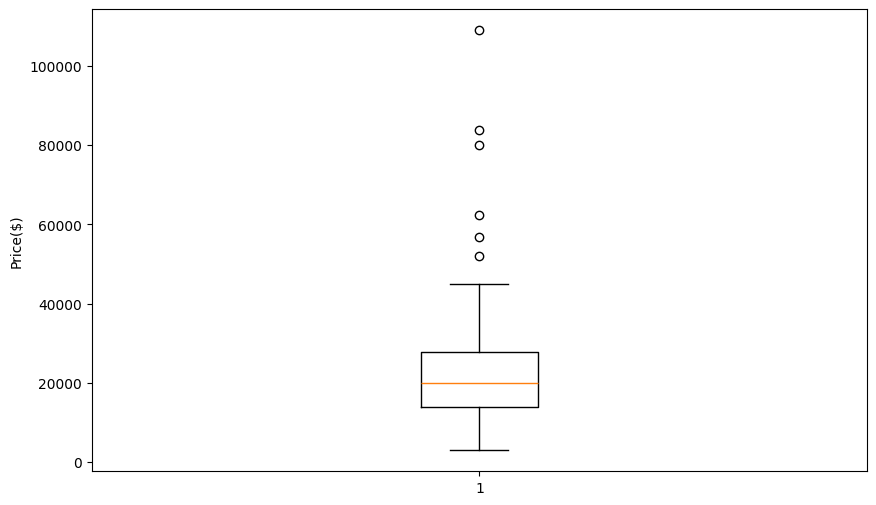

In [258]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.boxplot(df['Price'])
plt.ylabel('Price($)')
plt.show()

In [259]:
df_with_no_outliers = df[df['Price']<= 50000].copy()
df_with_no_outliers.shape


(93, 19)

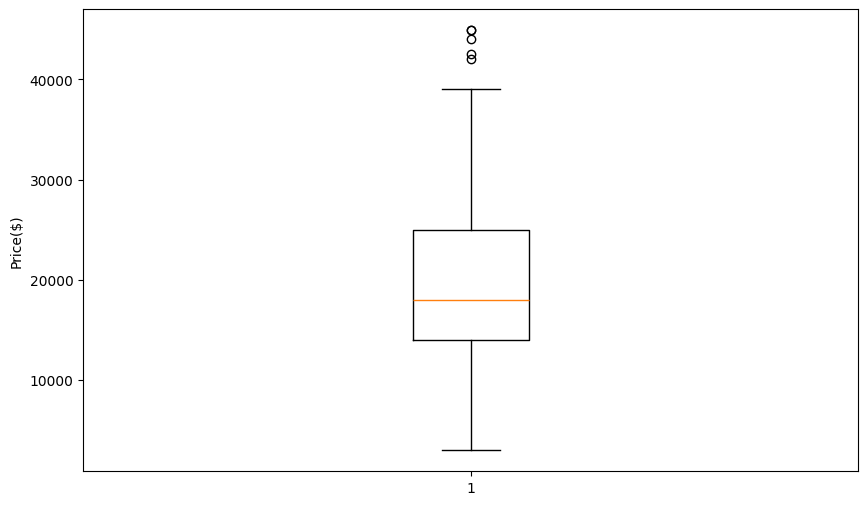

In [260]:
plt.figure(figsize=(10,6))
plt.boxplot(df_with_no_outliers['Price'])
plt.ylabel('Price($)')
plt.show()

In [261]:
model_less_outliers = RandomForestRegressor(n_estimators=500, random_state=42,max_depth =10)
model_less_outliers.fit(X_train, y_train)
print("Random Forest Model (less outliers) training completed.")

Random Forest Model (less outliers) training completed.


In [262]:
model_less_outliers.predict(X_test)

array([12648.72829566, 21771.78230113, 21527.64840612, 20313.14209052,
       15440.46602533, 18523.62177967, 21690.59602425, 15288.98413333,
       18595.32338527, 42506.6765684 , 16602.8002573 , 30428.86849196,
       19845.71166046, 13687.74010338, 27153.24432115, 31540.34727114,
       45274.61002222, 15291.39545278, 17294.88853499, 16029.95739054])

In [263]:
r2_new = r2_score(y_test, model_less_outliers.predict(X_test))
mae_new = mean_absolute_error(y_test, model_less_outliers.predict(X_test))
rmse_new = np.sqrt(mean_squared_error(y_test, model_less_outliers.predict(X_test)))
print("RANDOM FOREST MODEL (LESS OUTLIERS) PERFORMANCE")
print(f"Mean Absolute Error: ${mae_new:,.2f}")
print(f"R² Score: {r2_new:.4f}")
print(f"Root Mean Squared Error: ${rmse_new:,.2f}")

RANDOM FOREST MODEL (LESS OUTLIERS) PERFORMANCE
Mean Absolute Error: $7,790.73
R² Score: 0.5566
Root Mean Squared Error: $11,582.86
